In [1]:
import gensim

# Load pre-trained Word2Vec model.
# model = gensim.models.KeyedVectors.load('data/w2v-186891476-50000-300-5-5-plwiki-20170820.bin')
# model = gensim.models.KeyedVectors.load("data/w2v-2155073-50000-300-5-5-plwikibooks-20170820.bin")
# model = gensim.models.KeyedVectors.load("data/w2v-2427886-50000-300-5-5-plwiktionary-20170820.bin")
model = gensim.models.KeyedVectors.load('data/w2v-773752559-1000000-300-5-5-OpenSubtitles2016.bin')

Using TensorFlow backend.


In [2]:
model.most_similar(positive=['kobieta', 'król'], negative=['mężczyzna'])

[('królowa', 0.7126762866973877),
 ('księżniczka', 0.5617338418960571),
 ('elżbieta', 0.5241243839263916),
 ('andegaweńska', 0.5153706073760986),
 ('królem', 0.4992064833641052),
 ('aelle', 0.49542781710624695),
 ('euphemia', 0.49308931827545166),
 ('nierządnica', 0.4864857792854309),
 ('dama', 0.4855978488922119),
 ('cesarzowa', 0.48290133476257324)]

In [3]:
model.most_similar_cosmul(positive=['kobieta', 'brat'], negative=['mężczyzna'])

[('siostra', 0.9714462161064148),
 ('matka', 0.9080928564071655),
 ('córka', 0.8808967471122742),
 ('mama', 0.8779017925262451),
 ('żona', 0.8589485287666321),
 ('ciocia', 0.8572540283203125),
 ('babcia', 0.8528714179992676),
 ('kuzynka', 0.8413039445877075),
 ('przyjaciółka', 0.8368442058563232),
 ('pasierbica', 0.8348105549812317)]

In [24]:
model.most_similar(positive=['żonaty'], negative=['kobieta'])

[('rozwiedziony', 0.34714269638061523),
 ('zaręczony', 0.33659571409225464),
 ('komunistą', 0.31170615553855896),
 ('adoptowany', 0.3025285601615906),
 ('obrzezany', 0.3008688688278198),
 ('gejem', 0.3006894588470459),
 ('zajęty', 0.299405038356781),
 ('hazardzistą', 0.29934167861938477),
 ('zonaty', 0.29853737354278564),
 ('aktorem', 0.2903991937637329)]

In [4]:
model.wv.similarity("włączyć", "uruchomić")

0.66713626506226475

In [5]:
model.most_similar(positive=['żółty'])

[('czerwony', 0.6952233910560608),
 ('niebieski', 0.6946908831596375),
 ('zielony', 0.6716783046722412),
 ('zółty', 0.636924147605896),
 ('ochrowy', 0.6035279035568237),
 ('czarny', 0.5918793678283691),
 ('megaman', 0.5840376615524292),
 ('ostrosłup', 0.5769951343536377),
 ('rozpinany', 0.5719748735427856),
 ('fioletowo-biały', 0.5697745084762573)]

In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

top_n=50

top_words=model.wv.index2word[1000:1000+top_n]
top_words=np.append(np.array(top_words),np.array([np.array(model.most_similar_cosmul(w, topn=8))[:,0] for w in top_words]))
top_words=top_words.flatten()
top_words=set(top_words)

In [7]:
word_weights=[model.wv.word_vec(w, use_norm=False) for w in top_words]
word_indexes=list(top_words)

In [8]:
viz_words = len(word_weights)
tsne = TSNE()
#embed_tsne = tsne.fit_transform(model.wv.syn0[:viz_words, :])
embed_tsne = tsne.fit_transform(word_weights)

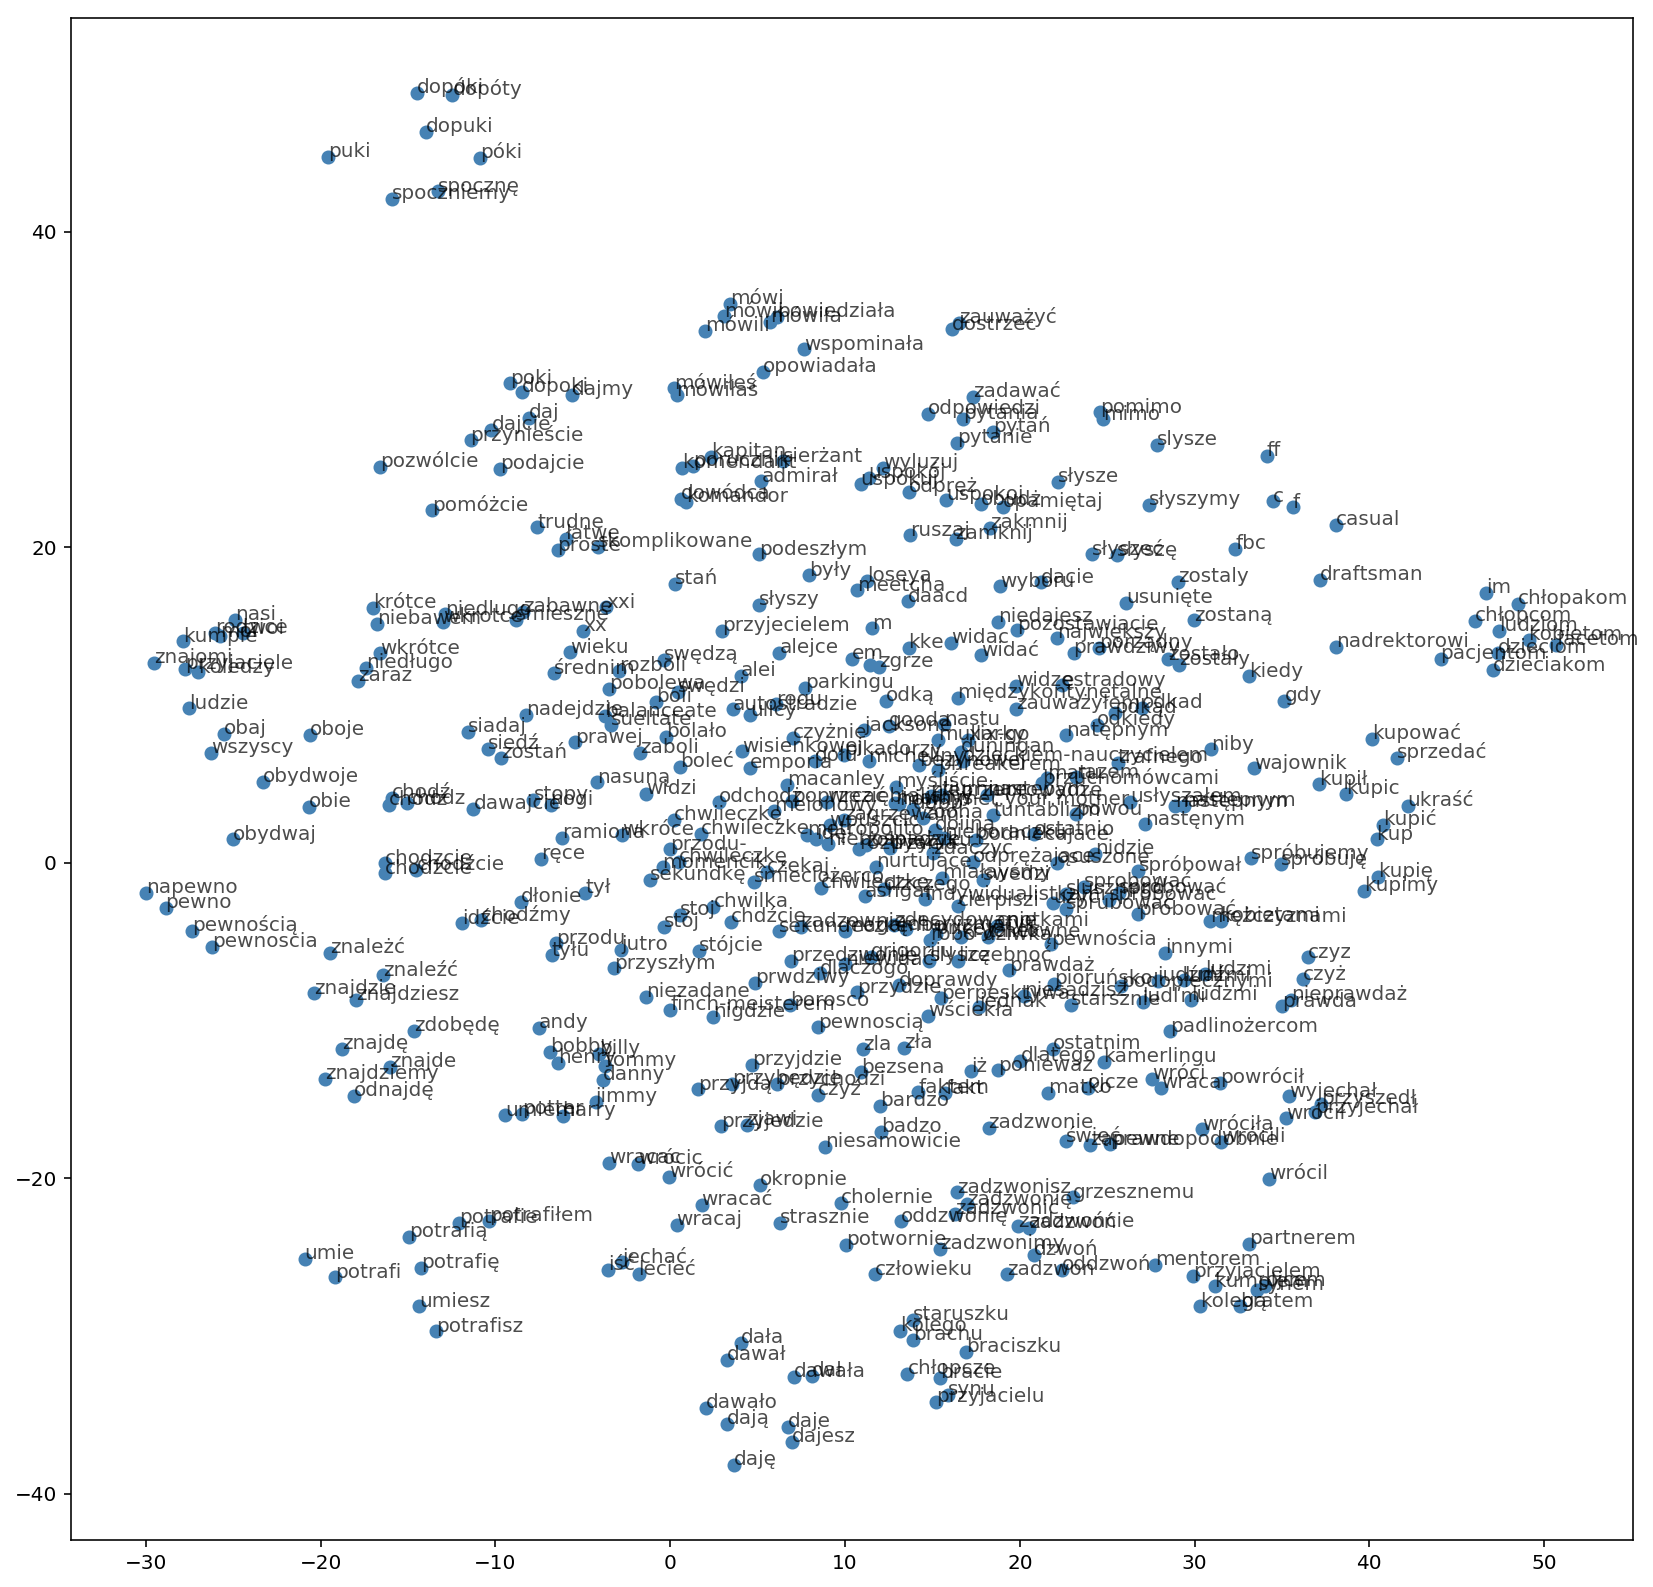

In [9]:
fig, ax = plt.subplots(figsize=(14, 14))
for idx in range(viz_words):
    plt.scatter(*embed_tsne[idx, :], color='steelblue')
    plt.annotate(word_indexes[idx], (embed_tsne[idx, 0], embed_tsne[idx, 1]), alpha=0.7)